In [14]:
import pandas as pd
import numpy as np
import graphviz

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
def viztree(decision_tree, feature_names):
    """Visualize a decision tree"""
    dot_data = export_graphviz(decision_tree, out_file=None, feature_names=feature_names, 
                               filled=True, rounded=True)   
    return graphviz.Source(dot_data)

In [26]:
X_train = pd.read_csv('X_train_encoded.csv', index_col=[0])
y_train = pd.read_csv('y_train.csv')

X_test = pd.read_csv('X_test_encoded.csv', index_col=[0])
y_test = pd.read_csv('y_test.csv')

y_train = y_train['Present']
y_test = y_test['Present']

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((88421, 29), (22106, 29), (88421,), (22106,))

In [33]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr = lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Train RMSE:', rmse)
accuracy = (accuracy_score(y_train, y_train_pred))
print('Train Accuracy:', accuracy)

rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Test RMSE:', rmse)
accuracy = (accuracy_score(y_test, y_test_pred))
print('Test Accuracy:', accuracy)

Train RMSE: 0.45323979608343923
Train Accuracy: 0.7945736872462424
Test RMSE: 0.44826434278996413
Test Accuracy: 0.7990590789830815


In [30]:
import matplotlib.pyplot as plt

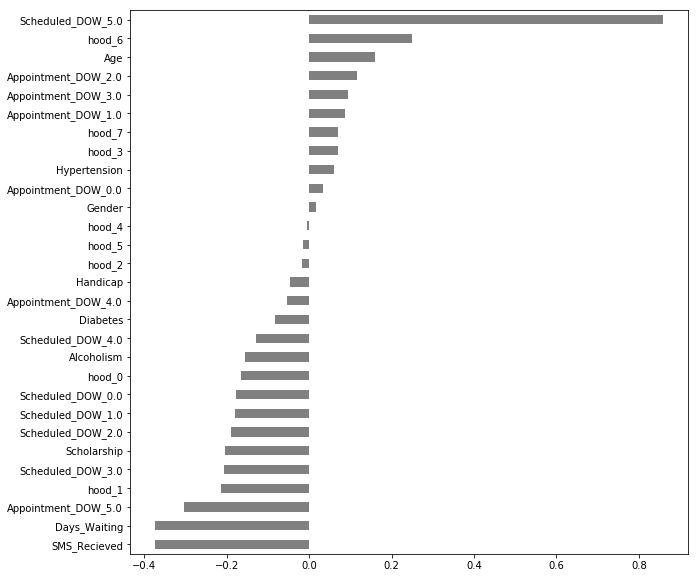

In [31]:
coefficients = pd.Series(lr.coef_[0], X_train.columns)
plt.figure(figsize=(10,10))
coefficients.sort_values().plot.barh(color='grey');

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train, y_train, cv=10)
print( scores.mean() )

0.7945736539949892


In [34]:
y_train.value_counts(normalize=True)

1    0.797763
0    0.202237
Name: Present, dtype: float64

In [36]:
X_train['Days_Waiting'].describe()

count    8.842100e+04
mean     2.325034e-15
std      1.000006e+00
min     -1.059885e+00
25%     -6.671976e-01
50%     -4.054063e-01
75%      3.145198e-01
max      1.104796e+01
Name: Days_Waiting, dtype: float64

# Feature Engineering

In [40]:
def make_features(X):
    X = X.copy()
    X['Days_Waiting**2'] = X['Days_Waiting'] ** 2
    X['Age**2'] = X['Age'] ** 2
    X['Hardship_Level'] = X['Hypertension'] + X['Diabetes'] + X['Alcoholism'] + X['Handicap'] + X['Scholarship'] 
    X['Age**Hardship'] = X['Age'] ** X['Hardship_Level']
    return X

In [41]:
X_train_features = make_features(X_train)
X_test_features = make_features(X_test)

In [44]:
X_train_features.shape, X_test_features.shape

((88421, 33), (22106, 33))

# Linear Regression #2

In [45]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr = lr.fit(X_train_features, y_train)

y_train_pred = lr.predict(X_train_features)
y_test_pred = lr.predict(X_test_features)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Train RMSE:', rmse)
accuracy = (accuracy_score(y_train, y_train_pred))
print('Train Accuracy:', accuracy)

rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Test RMSE:', rmse)
accuracy = (accuracy_score(y_test, y_test_pred))
print('Test Accuracy:', accuracy)

Train RMSE: 0.4501978418786573
Train Accuracy: 0.7973219031677995
Test RMSE: 0.45557157809754617
Test Accuracy: 0.7924545372297114
